In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Droping the unnessesary columns 

In [5]:
columns = ["Cabin","Name", "Ticket","PassengerId"]
data = data.drop(columns , axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Analysing the data 

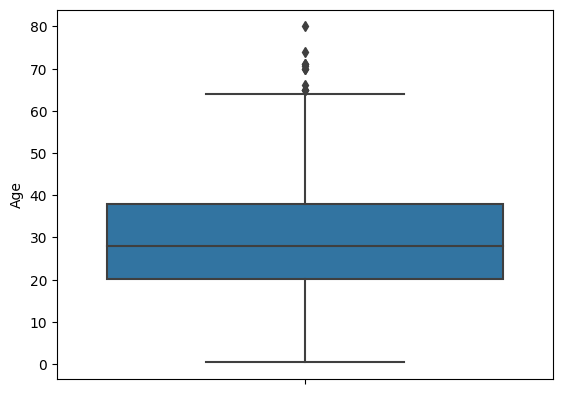

In [6]:
sns.boxplot(y=data["Age"])
plt.show()

In [7]:
data["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

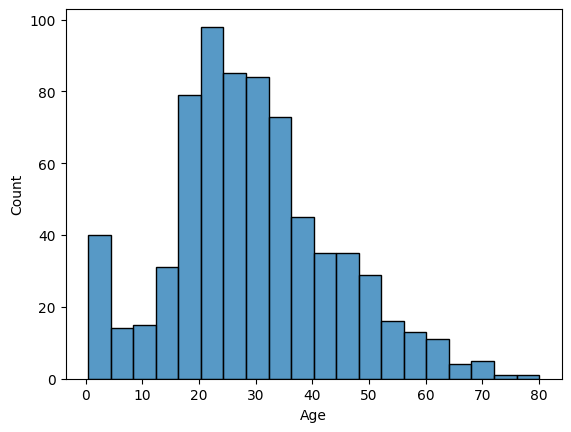

In [8]:
sns.histplot(data['Age'], bins=20)
plt.show()

In [9]:
data["Age"].mean()

29.69911764705882

In [10]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data["Embarked"] = le.fit_transform(data["Embarked"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## C =0 , Q =1 , S =2

In [11]:
corr_data = data.corr()
correlation = corr_data['Survived'].sort_values(ascending = False )
correlation

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Embarked   -0.163517
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [12]:
mode_value = data['Age'].mode().iloc[0]
mode_value

24.0

In [13]:
data['Age'] = data['Age'].fillna(mode_value)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [15]:
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


## Split the data 

In [17]:
data = pd.DataFrame(data)
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

print(x)
print(y)

[[ 3.      1.     22.     ...  0.      7.25    2.    ]
 [ 1.      0.     38.     ...  0.     71.2833  0.    ]
 [ 3.      0.     26.     ...  0.      7.925   2.    ]
 ...
 [ 3.      0.     24.     ...  2.     23.45    2.    ]
 [ 1.      1.     26.     ...  0.     30.      0.    ]
 [ 3.      1.     32.     ...  0.      7.75    1.    ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1

In [18]:
x.shape, y.shape

((891, 7), (891,))

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [21]:
x_train, x_test, y_train, y_test  = train_test_split(x, y  , test_size = 0.3 , random_state  = 0)
x_train.shape, x_test.shape

((623, 7), (268, 7))

## Implementing K-neigherest-neighbors 

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)

z = np.vstack((y_pred, y_test))
pd.DataFrame(z)


,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [25]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_train_pred ,y_train))

0.7313432835820896
0.9702127659574468


## Implementing Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [27]:
naive_model.fit(x_train, y_train)

GaussianNB()

In [28]:
y_pred = naive_model.predict(x_test)

In [29]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [30]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_train_pred ,y_train))

0.7873134328358209
0.9702127659574468


## Implementing Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="gini" ,random_state=44)

In [32]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=44)

In [33]:
y_pred = tree.predict(x_test)
y_train_pred = tree.predict(x_train)

In [34]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,0,0,0,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [35]:
accuracy_score(y_pred, y_test)

0.7947761194029851

## Implementing Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [37]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = forest.predict(x_test)

z = np.vstack((y_pred, y_test))
pd.DataFrame(z)

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
0,0,0,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [39]:
accuracy_score(y_pred, y_test)

0.8246268656716418